In [160]:
import cv2
import csv
import numpy as np
import sklearn
from sklearn.utils import shuffle
import math

In [161]:
lines = []

abs_steering_min = 0.1

with open('examples/sample_data/data/my_data/driving_log_all_1.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(csvfile)
    for row in reader:
        if (math.fabs(float(row[3])) > abs_steering_min):
            lines.append(row)
        
        
from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(lines, test_size=0.2)




def get_image(path, resize=False):
    filename = path.split("/")[-1]
    current_path = '/home/carnd/CarND-Behavioral-Cloning-P3/examples/sample_data/data/my_data/IMG/' + filename
    image = cv2.imread(current_path)
    #if resize:
    #    image = cv2.resize(image,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
    return image

def flip_image(image, angle):
    return (cv2.flip(image, 1), angle*-1.0)

def generator(lines, batch_size=32):
    num_samples = len(lines)
    while 1: # Loop forever so the generator never terminates
        shuffle(lines)
        for offset in range(0, num_samples, batch_size):
            batch_samples = lines[offset:offset+batch_size]
            images = []
            angles = []
            for line in batch_samples:
                central_path = line[0]
                central_image = get_image(central_path, False)
                #if central_image is None:
                #    print('!!!!!!!!!!!!!!!!!!' + central_path)
                left_path = line[1]
                left_image = get_image(left_path, False)
                right_path =  line[2]
                right_image = get_image(right_path, False)
                images.extend([central_image, left_image, right_image])
                steering_center = float(line[3])
                correction = 0.1 # this is a parameter to tune
                steering_left = steering_center + correction
                steering_right = steering_center - correction
                angles.extend([steering_center, steering_left, steering_right])
                fliped_central_image, fliped_central_angle = flip_image(central_image,steering_center)
                fliped_left_image, fliped_left_angle = flip_image(left_image,steering_left)
                fliped_right_image, fliped_right_angle = flip_image(right_image,steering_right)  
                images.extend([fliped_central_image, fliped_left_image, fliped_right_image])
                angles.extend([fliped_central_angle, fliped_left_angle, fliped_right_angle])
            X_train = np.array(images)
            y_train = np.array(angles)
            yield sklearn.utils.shuffle(X_train, y_train)

                


(160, 320, 3)
(160, 320, 3)


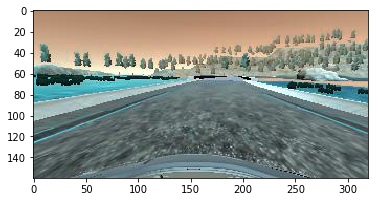

(65, 320, 3)


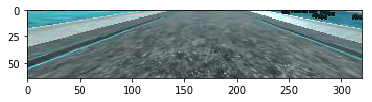

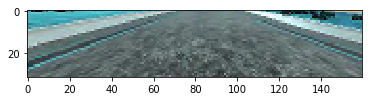

(32, 160, 3)


In [188]:
import matplotlib.pyplot as plt
%matplotlib inline
central_path = line[0]
central_image = get_image(central_path)
print(central_image.shape)



steering_center = float(line[3])
image = np.array(central_image)
#y_train = np.array(augmented_measurements)
print(image.shape)
plt.imshow(image)
plt.show()
cropped = image[70:135, 0:320]
print(cropped.shape)
plt.imshow(cropped)
plt.show()
resized_image =  cv2.resize(cropped,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
plt.imshow(resized_image)
plt.show()
print(resized_image.shape)



In [163]:
#print(X_train.shape)
#print(y_train.shape)
#print(np.average(y_train))

In [189]:
print(len(train_samples))
train_generator = generator(train_samples, batch_size=32)
validation_generator = generator(validation_samples, batch_size=32)
from keras.backend import tf as ktf
def resize_normalize(image):
    import tensorflow as tf
    #resize 
    resized = tf.image.resize_images(image, (30, 160))
    #normalize
    resized = resized/255.0 - 0.5
    return resized


5768


In [195]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Convolution2D, Input
from keras.backend import tf as ktf
model = Sequential()
model.add(Cropping2D(cropping=((70,25),(0,0)), input_shape = (160,320,3)))
model.add(Lambda(resize_normalize))#, output_shape=(30, 160, 3)))


#model.add(Lambda(lambda x: x/ 255.0 - 0.5, input_shape = (160,320,3)))
#model.add(Cropping2D(cropping=((35,10),(0,0))))

#
#Nvidia model

model.add(Convolution2D(24,5,5,border_mode='valid', activation='relu', subsample=(2,2)))
model.add(Convolution2D(36,5,5,border_mode='valid', activation='relu', subsample=(2,2)))
model.add(Convolution2D(48,5,5,border_mode='valid', activation='relu', subsample=(2,2)))
model.add(Convolution2D(64,3,3,border_mode='valid', activation='relu', subsample=(1,1)))
model.add(Convolution2D(64,3,3,border_mode='valid', activation='relu', subsample=(1,1)))
model.add(Flatten())
model.add(Dense(1164, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='tanh'))

model.compile(loss = 'mse', optimizer='adam', lr=0.01)
model.fit_generator(train_generator, samples_per_epoch= len(train_samples), \
                    validation_data=validation_generator, \
            nb_val_samples=len(validation_samples), nb_epoch=4, verbose = 1)
model.save('model.h5')

ValueError: Negative dimension size caused by subtracting 3 from 1 for 'Conv2D_114' (op: 'Conv2D') with input shapes: [?,1,17,48], [3,3,48,64].

In [73]:
X_train.shape

NameError: name 'X_train' is not defined

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
image=X_train[0].squeeze()
plt.imshow(image)
cv2.imshow(images[0],0)
print(X_train[0])

NameError: name 'X_train' is not defined

In [27]:
#type(X_train[0])
print(X_train[0])

None
